# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Deep%20Computer%20Vision/CNN_python/Module%205-%20CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [2]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In this notebook, we will be working with mnist data set: https://en.wikipedia.org/wiki/MNIST_database
* 60,000 train images
* 10,000 test images
* image size (28,28)

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
type(x_test)

numpy.ndarray

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

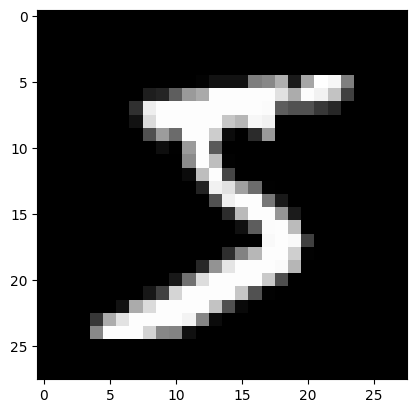

In [9]:
plt.imshow(x_train[0], cmap='gray')  # Display the array as a grayscale image
plt.show()  # Display the figure

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Convolutional Neural Networks (CNN)

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# reshaping
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy', # Multi-class classification (orders, no one-hot encoding)
                  metrics=['accuracy'])

    return model

In [35]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [22]:
# params
1*(3*3)*32 + 32

320

In [24]:
32*(3*3)*64+64

18496

In [25]:
64*(3*3)*128+128

73856

In [26]:
3*3*128

1152

In [27]:
1152*64+64

73792

In [28]:
64*10+10

650

output shape:
* channels are the number of filters
* output size = $floor(\frac{n_{input} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [29]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [36]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="first_CNN.h5",save_best_only=True, monitor="val_loss")


In [37]:
history = model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          epochs=10, batch_size=64, callbacks=[modelcheckpoint])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1722 - accuracy: 0.9462 - val_loss: 0.0596 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0494 - val_accuracy: 0.9834
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0248 - val_accuracy: 0.9923
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 

In [39]:
60000/64

937.5

In [40]:
test_model = keras.models.load_model("first_CNN.h5")
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9923


[0.024761609733104706, 0.9922999739646912]

As you can see, this simple CNN performs really well in the test set with +99% accuracy.

## Model evaluation

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
metrics = pd.DataFrame(history.history)

In [43]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.172188,0.946233,0.059573,0.9803
1,0.044663,0.986100,0.036307,0.9884
2,0.031318,0.990267,0.049405,0.9834
3,0.022397,0.993317,0.027221,0.9916
4,0.017570,0.994333,0.024762,0.9923


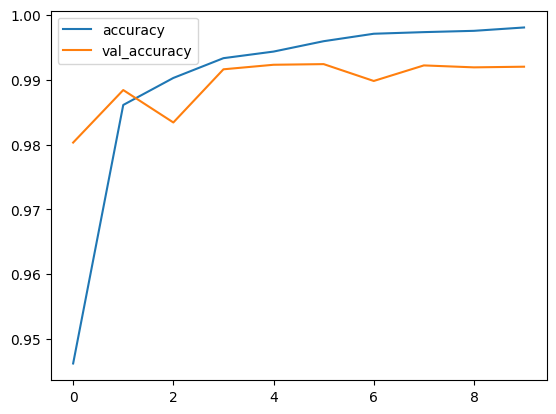

In [44]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

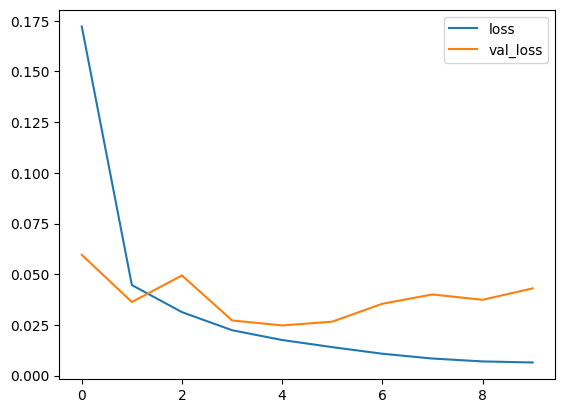

In [45]:
metrics[['loss','val_loss']].plot()
plt.show()

In [46]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 [==============================] - 1s 3ms/step


array([2.8131535e-14, 5.5395995e-14, 2.5510803e-13, 3.5515774e-10,
       5.9323863e-14, 2.1981943e-14, 5.9206828e-19, 1.0000000e+00,
       6.0419801e-13, 5.6198830e-11], dtype=float32)

In [49]:
predictions_prob.shape

(10000, 10)

In [47]:
y_test[0]

7

let's generate prediction classes:
* For binary classification, np.where(y_pred > threshold, 1,0)
* For multiclass classification, np.argmax(predictions, axis=1)




In [50]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([7, 2, 1, 0, 4])

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    1,    0,    1,    1,    0,    0],
       [   1, 1126,    0,    1,    1,    1,    2,    1,    1,    1],
       [   2,    0, 1022,    1,    2,    0,    0,    5,    0,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   1,    0,    0,    7,    0,  882,    1,    0,    1,    0],
       [   2,    2,    1,    0,    3,    1,  948,    0,    1,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1024,    0,    1],
       [   1,    0,    2,    1,    2,    1,    1,    1,  964,    1],
       [   0,    0,    0,    2,   10,    3,    0,    1,    1,  992]])

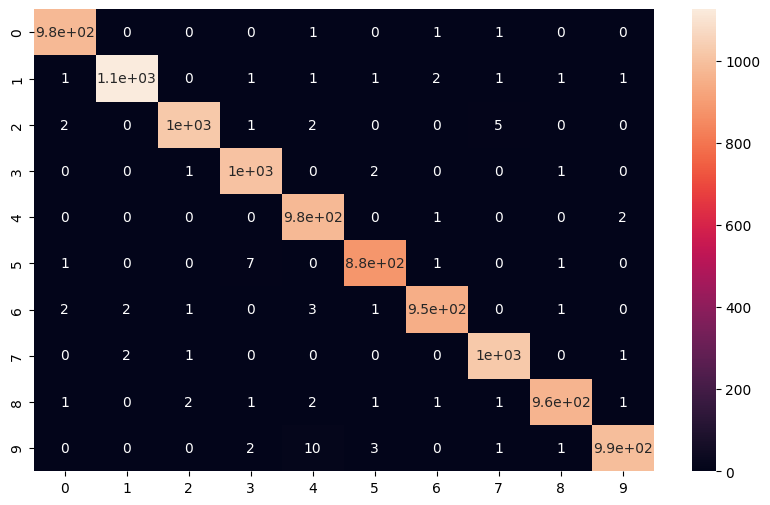

In [54]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

Let's look into some of the misclassified images!

In [55]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [56]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[18, 321, 340, 359, 445, 582, 625, 646, 659]

In [57]:
for a, b in enumerate(misclassified_images[:9]):
  print (a, b)

0 18
1 321
2 340
3 359
4 445
5 582
6 625
7 646
8 659


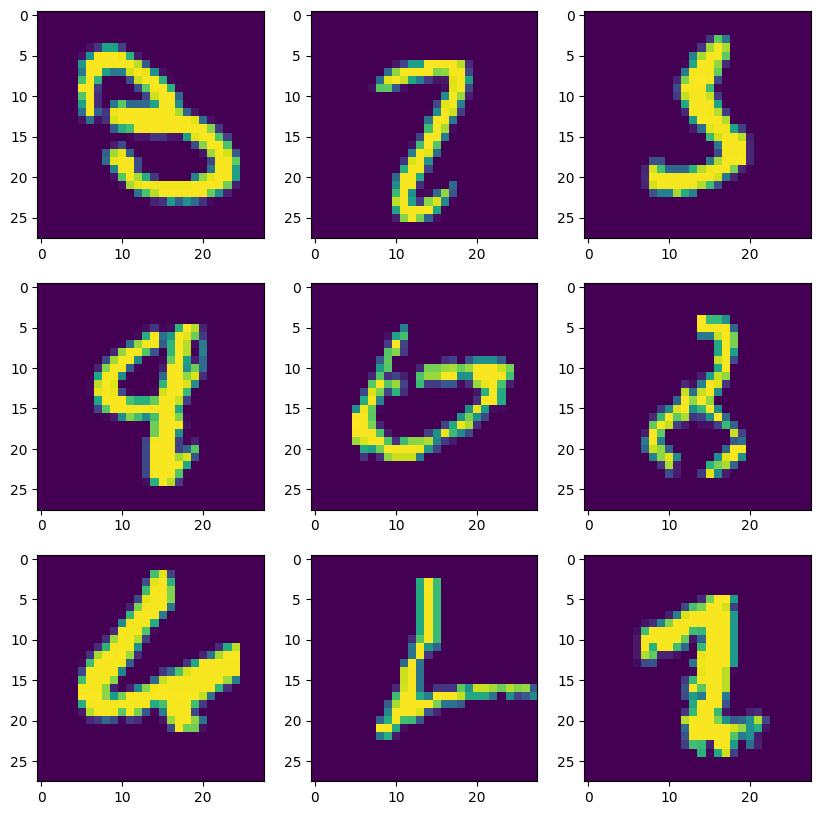

In [60]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [61]:
actuals

[3, 2, 5, 9, 6, 8, 6, 2, 2]

In [62]:
predictions[misclassified_images[:9]]

array([5, 7, 3, 4, 0, 2, 4, 4, 7])

#Done